## ***Prediction using Supervised ML (Level - Beginner)***

● Predict the percentage of an student based on the no. of study hours.

● What will be predicted score if a student studies for 9.25 hrs/ day?

● Task submission:
1. Host the code on GitHub Repository (public). Record the code and output in a video. Post the video on YouTube
2. Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn profile, not TSF Network.
3. Submit the LinkedIn link in Task Submission Form when shared.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("student_scores - student_scores.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#Understanding the data statistically

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**From the above description, we can understand that - longer the hours a student studies, the greater are his scores..**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**With the help this function, we can check if the data contains any null value, wrong datatype, and etc..**

#Visualizing the data 

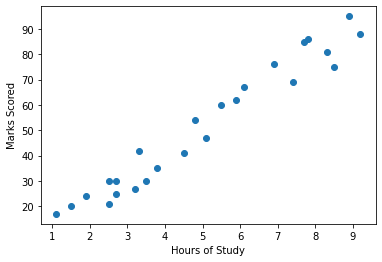

In [11]:
plt.scatter(x='Hours', y='Scores',data=data)
plt.xlabel("Hours of Study")
plt.ylabel("Marks Scored")
plt.show()

**Splitting the data into X=hours and Y=scores for further evaluations**

In [15]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**splitting X and Y data into Train and Test data using Sklearn**

In [18]:
from sklearn.model_selection import train_test_split

**80% of data for training, 20% of data for testing**


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

**Model - Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


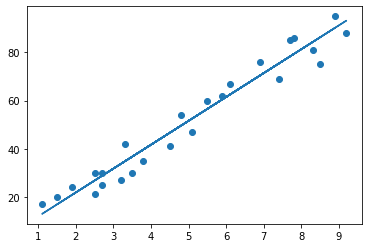

In [21]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**predicted score if a student studies for 9.25 hrs/ day**

In [30]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Model Evaluation**

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
